# Qualitative results reproducability

In this notebook, all reproduced results from the original paper which are included in the reproducibility paper are calculated and shown.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.lines as mlines

# Location of directory containing the logged results of the executed runs
logdir = "C:/Users/pdder/PycharmProjects/pythonProject2/wilds-main/examples/logs"

In [2]:
def get_eval_data(dataset, algorithm, split="train", run=1, seed=14):
    # Returns the eval-data of the given dataset, algorithm, split, run and seed as a pandas Dataframe
    path = os.path.join(logdir, dataset, algorithm, "run_"+str(run)+"_seed_"+str(seed), split+"_eval.csv")
    data = pd.read_csv(path)
    return data

def get_algo_data(dataset, algorithm, run=1, split="train", seed=14):
    # Returns the algo-data of the given dataset, algorithm, split, run and seed as a pandas Dataframe.
    path = os.path.join(logdir, dataset, algorithm, "run_"+str(run)+"_seed_"+str(seed), split+"_algo.csv")
    data = pd.read_csv(path)
    return data

plt.rcParams.update({'font.size': 14})

def plot_alphas(dataset, algo, run, seed=14, labels=["noisy majority", "clean majority", "clean minority"], split="train", nr_groups=3):
     # Plots the group weights of the *nr_groups* groups given the dataset, algorithm, split, run and seed with the given labels.
    algo_data = get_algo_data(dataset, algo, seed=seed, run=run, split=split)
    algo_data = algo_data.groupby("epoch").mean()
    plt.figure(figsize=(4,3))
    plt.ylim(0,1)
    plt.ylabel("Training weight of group")
    plt.xlabel("Epoch")
    colours = ['r', 'g', 'b', 'y', 'm']
    for i in range(nr_groups):
        if algo=="groupDRO":
            plt.plot(algo_data["weight_group:"+str(i)], colours[i])
        elif algo=="CG":
            plt.plot(algo_data["alpha_group:"+str(i)], colours[i])
    plt.legend(labels)
    plt.show()

def plot_avg_alphas(dataset, algo, runs, seeds, labels=["noisy majority", "clean majority", "clean minority"], split="train", nr_groups=3):
    # Plots the group weights of the groups of the given parameters averaged over the given runs & corresponding seeds.
    algo_data = []
    for i, run in enumerate(runs):
        algo_results = get_algo_data(dataset, algo, run=run, seed=seeds[i], split=split).groupby("epoch").mean()
        algo_data.append(algo_results)
    alpha_name = "weight_group:" if algo=="groupDRO" else "alpha_group:"
    plt.figure(figsize=(4,3))
    plt.ylim(0,1)
    plt.ylabel("Training weight of group")
    plt.xlabel("Epoch")
    colours = ['r', 'g', 'b', 'y', 'm']
    for group in range(nr_groups):
        alphas = np.zeros((len(runs), len(algo_data[0][alpha_name+"0"])))
        for i, data in enumerate(algo_data):
            alphas[i]=(data[alpha_name+str(group)])
        mean = np.mean(alphas, axis=0)
        std = np.std(alphas, axis=0)
        plt.plot(mean, colours[group], label=labels[group])
        # Indicates standard deviation around mean, commented out for visibility
#         plt.fill_between(range(len(mean)),mean-std, mean+std, color=colours[group], alpha=0.5)
    plt.legend()
    plt.show()

def plot_multiple_alphas(dataset, algo, runs, seeds, labels=["noisy majority", "clean majority", "clean minority"], split="train", nr_groups=3):
    # Plots all group weights of the groups with given runs & corresponding seeds with the given parameters.
    algo_data = []
    for i, run in enumerate(runs):
        algo_results = get_algo_data(dataset, algo, run=run, seed=seeds[i], split=split).groupby("epoch").mean()
        algo_data.append(algo_results)
    alpha_name = "weight_group:" if algo=="groupDRO" else "alpha_group:"
    plt.figure(figsize=(4,3))
    plt.ylim(0,1)
    plt.ylabel("Training weight of group")
    plt.xlabel("Epoch")
    colours = ['r', 'g', 'b', 'y', 'm']
    for group in range(nr_groups):
        alphas = np.zeros((len(runs), len(algo_data[0][alpha_name+"0"])))
        for i, data in enumerate(algo_data):
            alphas[i]=(data[alpha_name+str(group)])
            plt.plot(alphas[i], colours[group])
    patches = []
    for i, label in enumerate(labels):
        patches.append(mlines.Line2D([], [], color=colours[i], label=label))
    plt.legend(handles=patches)
    plt.show()
    
def get_wgloss(dataset, algo, run, seed):
    # Returns the worst group loss of the last model of the given dataset, algorithm, run & seed
    data = get_eval_data(dataset, algo, split="test", run=run, seed=seed)
    data_train = get_eval_data(dataset, algo, split="train", run=run, seed=seed)
    best_epoch = np.where(data_train["loss_all"]==np.min(data_train["loss_all"]))[0][0]
    return data["loss_wg"][data.shape[0]-1]
#     return data["loss_wg"][best_epoch]

def get_wgloss_stats(dataset, runs=[1,2,3,4,5,6], seeds=[10,11,12,13,14,15]):
    # Returns the mean & std of worst group loss over the given runs & corresponding seeds for algorithms CGD & Group-DRO
    CG_wgloss = []
    GDRO_wgloss = []
    for run, seed in zip(runs, seeds):
        GDRO_wgloss.append(get_wgloss(dataset, "groupDRO", run, seed))
        CG_wgloss.append(get_wgloss(dataset, "CG", run, seed))
    CG_mean, CG_std = np.mean(CG_wgloss), np.std(CG_wgloss)
    GDRO_mean, GDRO_std = np.mean(GDRO_wgloss), np.std(GDRO_wgloss)
    print(dataset)
    print("Group-DRO Worst loss: "+ str(np.around(GDRO_mean,2)) + " ("+  str(np.around(GDRO_std,2)) + ")")
    print("CG Worst loss: "+ str(np.around(CG_mean,2)) + " ("+  str(np.around(CG_std,2)) + ")")
    return #CG_mean, CG_std, GDRO_mean, GDRO_std


# Reproducability of Qualitative Results

## Noisy Simple dataset group weights

CG average group weights


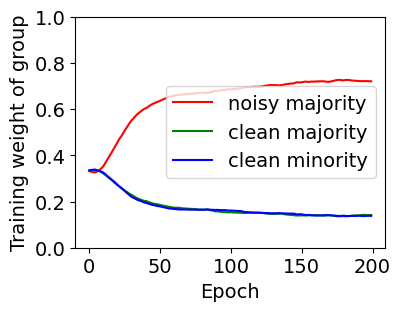

Group-DRO average group weights


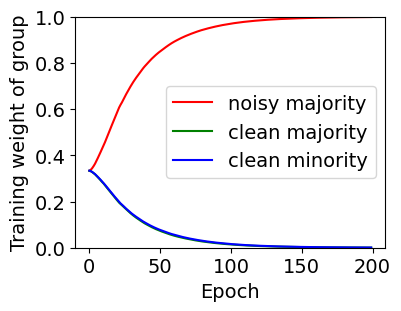

CG group weights of all runs


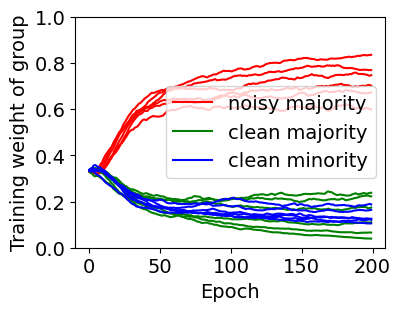

Group-DRO group weights of all runs


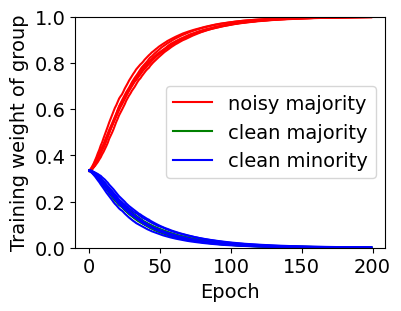

In [3]:
# plot_alphas("noisy_2feature", "CG", 2)
# plot_alphas("noisy_2feature", "groupDRO", 6)
# plot_alphas("noisy_2feature", "CG", 6)
# plot_alphas("noisy_2feature", "groupDRO", 3)

print("CG average group weights")
plot_avg_alphas("noisy_2feature", "CG", [1,2,3,4,5,6], [10,11,12,13,14,15])
print("Group-DRO average group weights")
plot_avg_alphas("noisy_2feature", "groupDRO", [1,2,3,4,5,6], [10,11,12,13,14,15])

print("CG group weights of all runs")
plot_multiple_alphas("noisy_2feature", "CG", [1,2,3,4,5,6], [10,11,12,13,14,15])
print("Group-DRO group weights of all runs")
plot_multiple_alphas("noisy_2feature", "groupDRO", [1,2,3,4,5,6], [10,11,12,13,14,15])


## Rotated dataset group weights

CG average group weights


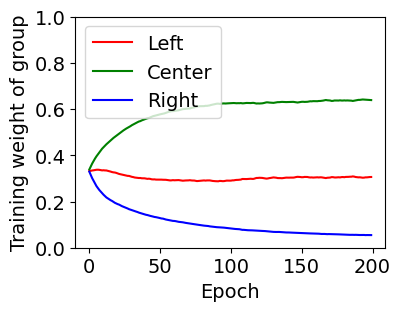

Group-DRO average group weights


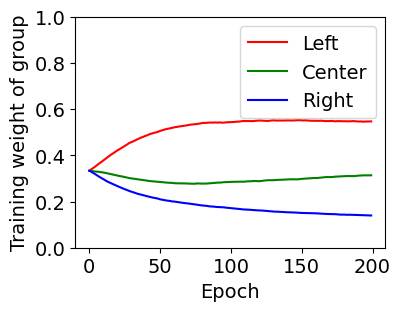

CG group weights of all runs


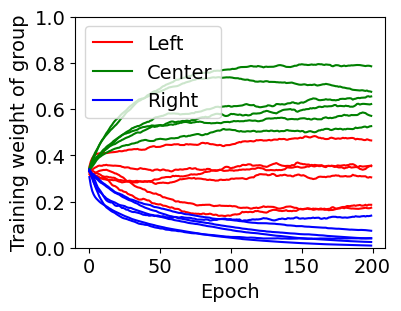

Group-DRO group weights of all runs


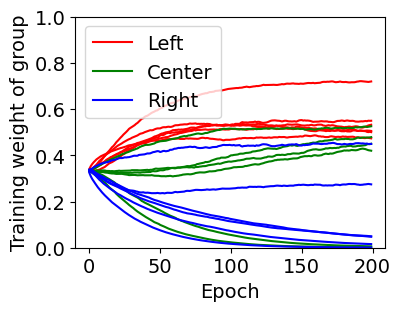

In [4]:
# plot_alphas("rot_simple", "groupDRO", 6, labels=["Left", "Center", "Right"])
# plot_alphas("rot_simple", "CG", 6, labels=["Left", "Center", "Right"])

print("CG average group weights")
plot_avg_alphas("rot_simple", "CG", [1,2,3,4,5,6], [10,11,12,13,14,15], labels=["Left", "Center", "Right"])
print("Group-DRO average group weights")
plot_avg_alphas("rot_simple", "groupDRO", [1,2,3,4,5,6], [10,11,12,13,14,15], labels=["Left", "Center", "Right"])

print("CG group weights of all runs")
plot_multiple_alphas("rot_simple", "CG", [1,2,3,4,5,6], [10,11,12,13,14,15], labels=["Left", "Center", "Right"])
print("Group-DRO group weights of all runs")
plot_multiple_alphas("rot_simple", "groupDRO", [1,2,3,4,5,6], [10,11,12,13,14,15], labels=["Left", "Center", "Right"])


## Spurious dataset group weights

CG average group weights


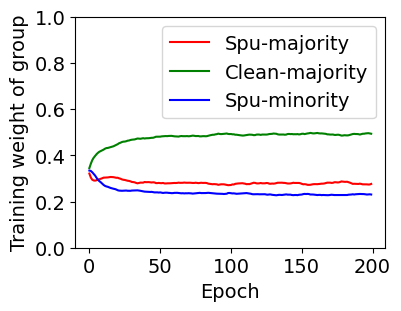

Group-DRO average group weights


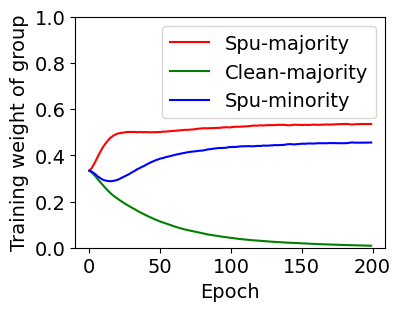

CG group weights of all runs


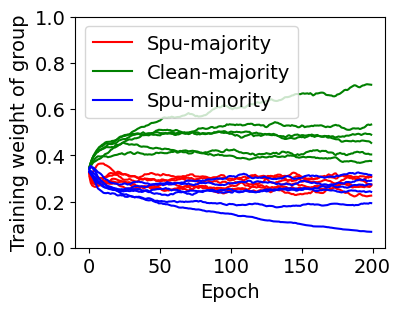

Group-DRO group weights of all runs


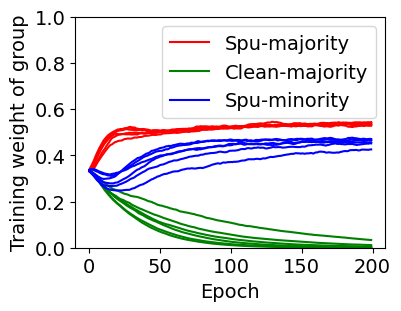

In [5]:
# plot_alphas("spu_2feature", "groupDRO", 2, labels=["Spu-majority", "Clean-majority", "Spu-minority"])
# plot_alphas("spu_2feature", "CG", 6, labels=["Spu-majority", "Clean-majority", "Spu-minority"])
print("CG average group weights")
plot_avg_alphas("spu_2feature", "CG", [1,2,3,4,5,6], [10,11,12,13,14,15], labels=["Spu-majority", "Clean-majority", "Spu-minority"])
print("Group-DRO average group weights")
plot_avg_alphas("spu_2feature", "groupDRO", [1,2,3,4,5,6], [10,11,12,13,14,15], labels=["Spu-majority", "Clean-majority", "Spu-minority"])

print("CG group weights of all runs")
plot_multiple_alphas("spu_2feature", "CG", [1,2,3,4,5,6], [10,11,12,13,14,15], labels=["Spu-majority", "Clean-majority", "Spu-minority"])
print("Group-DRO group weights of all runs")
plot_multiple_alphas("spu_2feature", "groupDRO", [1,2,3,4,5,6], [10,11,12,13,14,15], labels=["Spu-majority", "Clean-majority", "Spu-minority"])


## Worst group loss

In [6]:
get_wgloss_stats("noisy_2feature")
get_wgloss_stats("rot_simple")
get_wgloss_stats("spu_2feature")


noisy_2feature
Group-DRO Worst loss: 0.37 (0.02)
CG Worst loss: 0.3 (0.01)
rot_simple
Group-DRO Worst loss: 0.75 (0.21)
CG Worst loss: 0.7 (0.12)
spu_2feature
Group-DRO Worst loss: 0.62 (0.07)
CG Worst loss: 0.42 (0.04)


# Extension of Qualitative results for 5 groups

## Noisy 5 Groups group weights

CG average group weights


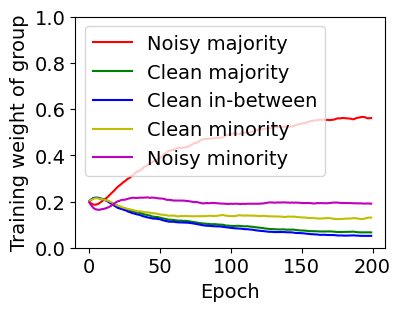

Group-DRO average group weights


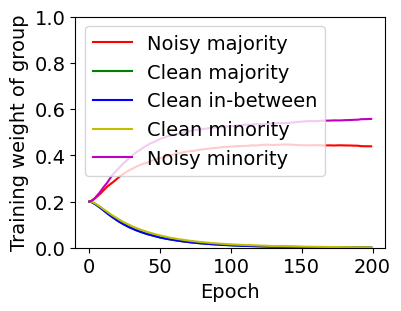

CG group weights of all runs


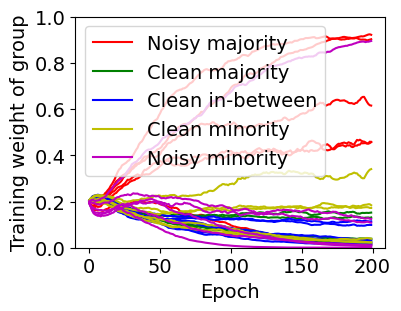

Group-DRO group weights of all runs


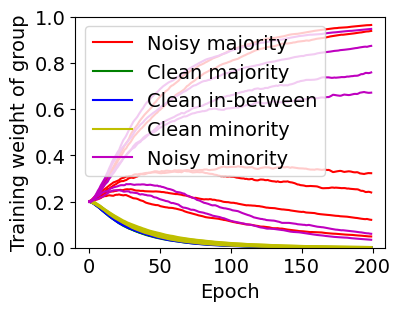

In [7]:
# plot_alphas("noisy_5group", "groupDRO", 1, seed=10, labels=['Noisy majority', 'Clean majority', 'Clean in-between', 'Clean minority','Noisy minority'], nr_groups=5)
# plot_alphas("noisy_5group", "CG", 306, seed=15, labels=['Noisy majority', 'Clean majority', 'Clean in-between', 'Clean minority','Noisy minority'], nr_groups=5)

print("CG average group weights")
plot_avg_alphas("noisy_5group", "CG", [301,302,303,304,305,306], [10,11,12,13,14,15], labels=['Noisy majority', 'Clean majority', 'Clean in-between', 'Clean minority','Noisy minority'], nr_groups=5)
print("Group-DRO average group weights")
plot_avg_alphas("noisy_5group", "groupDRO", [301,302,303,304,305,306], [10,11,12,13,14,15], labels=['Noisy majority', 'Clean majority', 'Clean in-between', 'Clean minority','Noisy minority'], nr_groups=5)

print("CG group weights of all runs")
plot_multiple_alphas("noisy_5group", "CG", [301,302,303,304,305,306], [10,11,12,13,14,15], labels=['Noisy majority', 'Clean majority', 'Clean in-between', 'Clean minority','Noisy minority'], nr_groups=5)
print("Group-DRO group weights of all runs")
plot_multiple_alphas("noisy_5group", "groupDRO", [301,302,303,304,305,306], [10,11,12,13,14,15], labels=['Noisy majority', 'Clean majority', 'Clean in-between', 'Clean minority','Noisy minority'], nr_groups=5)


## Rotated dataset 5 groups group weights

CG average group weights


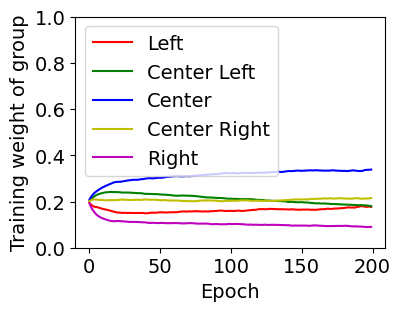

Group-DRO average group weights


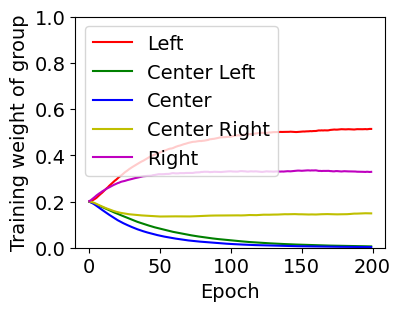

CG group weights of all runs


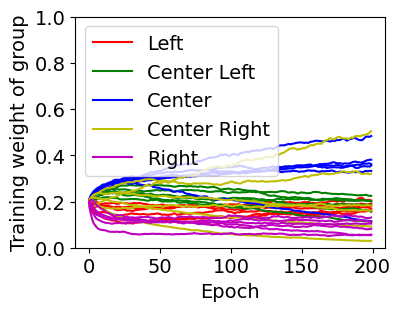

Group-DRO group weights of all runs


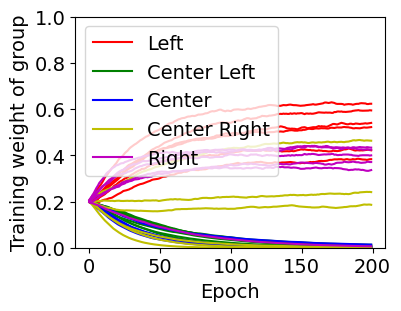

In [8]:
# plot_alphas("rot_5group", "groupDRO", 1, seed=10, labels=["Left", "Center Left", "Center", "Center Right", "Right"], nr_groups=5)
# plot_alphas("rot_5group", "CG", 301, seed=10, labels=["Left", "Center Left", "Center", "Center Right", "Right"], nr_groups=5)

print("CG average group weights")
plot_avg_alphas("rot_5group", "CG", [301,302,303,304,305,306], [10,11,12,13,14,15], labels=["Left", "Center Left", "Center", "Center Right", "Right"], nr_groups=5)
print("Group-DRO average group weights")
plot_avg_alphas("rot_5group", "groupDRO", [301,302,303,304,305,306], [10,11,12,13,14,15], labels=["Left", "Center Left", "Center", "Center Right", "Right"], nr_groups=5)

print("CG group weights of all runs")
plot_multiple_alphas("rot_5group", "CG", [301,302,303,304,305,306], [10,11,12,13,14,15], labels=["Left", "Center Left", "Center", "Center Right", "Right"], nr_groups=5)
print("Group-DRO group weights of all runs")
plot_multiple_alphas("rot_5group", "groupDRO", [301,302,303,304,305,306], [10,11,12,13,14,15], labels=["Left", "Center Left", "Center", "Center Right", "Right"], nr_groups=5)


## Spurious 5 groups group weigths

CG average group weights


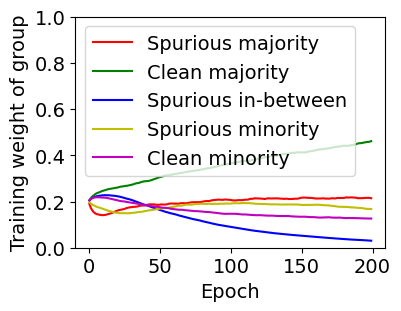

Group-DRO average group weights


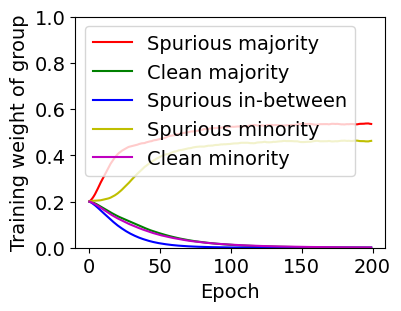

CG group weights of all runs


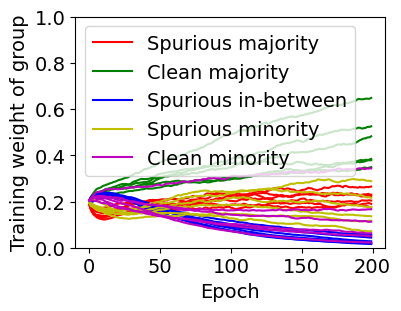

Group-DRO group weights of all runs


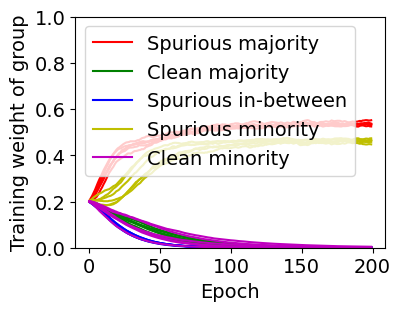

In [9]:
# plot_alphas("spu_5group", "CG", 1, seed=10, labels=['Spurious majority', 'Clean majority', 'Spurious in-between', 'Spurious minority','Clean minority'], nr_groups=5)
# plot_alphas("spu_5group", "groupDRO", 1, seed=10, labels=['Spurious majority', 'Clean majority', 'Spurious in-between', 'Spurious minority','Clean minority'], nr_groups=5)

print("CG average group weights")
plot_avg_alphas("spu_5group", "CG", [301,302,303,304,305, 306], [10,11,12,13,14,15], labels=['Spurious majority', 'Clean majority', 'Spurious in-between', 'Spurious minority','Clean minority'], nr_groups=5)
print("Group-DRO average group weights")
plot_avg_alphas("spu_5group", "groupDRO", [301,302,303,304,305,306], [10,11,12,13,14,15], labels=['Spurious majority', 'Clean majority', 'Spurious in-between', 'Spurious minority','Clean minority'], nr_groups=5)

print("CG group weights of all runs")
plot_multiple_alphas("spu_5group", "CG", [301,302,303,304,305, 306], [10,11,12,13,14,15], labels=['Spurious majority', 'Clean majority', 'Spurious in-between', 'Spurious minority','Clean minority'], nr_groups=5)
print("Group-DRO group weights of all runs")
plot_multiple_alphas("spu_5group", "groupDRO", [301,302,303,304,305,306], [10,11,12,13,14,15], labels=['Spurious majority', 'Clean majority', 'Spurious in-between', 'Spurious minority','Clean minority'], nr_groups=5)


## Worst group loss

In [10]:
# data = get_eval_data("noisy_2feature", "CG", split="test", run=2, seed=11)
# best_epoch = np.where(data["loss_all"]==np.min(data["loss_all"]))[0][0]
# print(best_epoch)
# data["loss_wg"][best_epoch]
# data

get_wgloss_stats("noisy_5group", runs=[301,302,303,304,305,306])
get_wgloss_stats("rot_5group", runs=[301,302,303,304,305,306])
get_wgloss_stats("spu_5group", runs=[301,302,303,304,305,306])


noisy_5group
Group-DRO Worst loss: 0.47 (0.06)
CG Worst loss: 0.3 (0.03)
rot_5group
Group-DRO Worst loss: 0.68 (0.05)
CG Worst loss: 0.87 (0.07)
spu_5group
Group-DRO Worst loss: 0.55 (0.04)
CG Worst loss: 0.39 (0.03)


# Asymmetric distribution

## Noisy

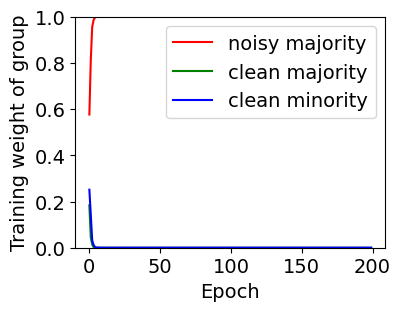

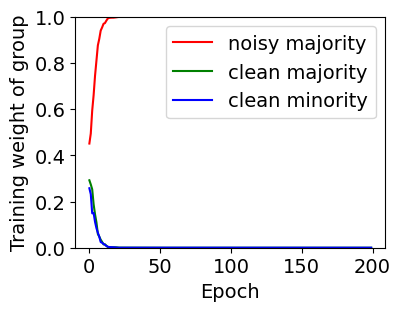

In [11]:
# plot_alphas("asymmetric_noisy", "CG", 1, seed=14)
# plot_alphas("asymmetric_noisy", "groupDRO", 1, seed=14)
plot_alphas("asymmetric_noisy", "CG", 2, seed=15)
plot_alphas("asymmetric_noisy", "groupDRO", 2, seed=15)

## Spurious

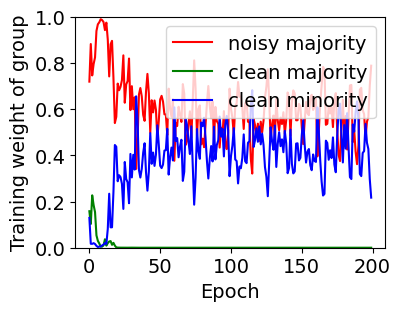

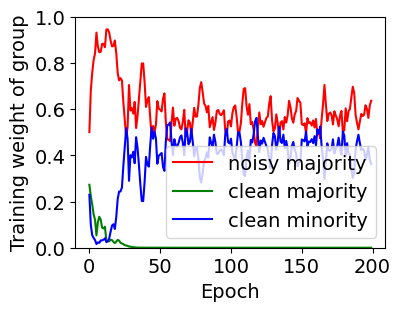

In [12]:
plot_alphas("asymmetric_spu", "CG", 1, seed=15)
plot_alphas("asymmetric_spu", "groupDRO", 1, seed=15)

# Reproducability of Experiments

In [13]:
def get_accuracy_stats(dataset, run=101, seed=10, algos=["ERM", "groupDRO", "CG"]):
    # Prints the average and worst group accuracy for given dataset, run & corresponding seed, and specified algorithms.
    print("Accuracies for dataset", dataset)
    print("---------------------------------")
    for algo in algos:
        data = get_eval_data(dataset,algo, split="test", run=run, seed=seed)
        print("Algorithm:",algo)
        acc_avg = "adj_acc_avg" if dataset=="waterbirds" else "acc_avg"
        print("Average accuracy:",np.around(100*data[acc_avg].iloc[-1], 1))
        print("Worst group accuracy:", np.around(100*data["acc_wg"].iloc[-1],1))
        print("---------------------------------")
    print()
get_accuracy_stats("celebA")
get_accuracy_stats("waterbirds")
get_accuracy_stats("cmnist")

Accuracies for dataset celebA
---------------------------------
Algorithm: ERM
Average accuracy: 95.2
Worst group accuracy: 37.8
---------------------------------
Algorithm: groupDRO
Average accuracy: 95.4
Worst group accuracy: 45.6
---------------------------------
Algorithm: CG
Average accuracy: 95.3
Worst group accuracy: 50.6
---------------------------------

Accuracies for dataset waterbirds
---------------------------------
Algorithm: ERM
Average accuracy: 78.0
Worst group accuracy: 0.0
---------------------------------
Algorithm: groupDRO
Average accuracy: 81.7
Worst group accuracy: 68.8
---------------------------------
Algorithm: CG
Average accuracy: 87.1
Worst group accuracy: 80.5
---------------------------------

Accuracies for dataset cmnist
---------------------------------
Algorithm: ERM
Average accuracy: 89.3
Worst group accuracy: 78.7
---------------------------------
Algorithm: groupDRO
Average accuracy: 90.4
Worst group accuracy: 80.9
--------------------------------